# Save Preprocessed Data
---

### 개요
* Preprocess 처리 얻은 **preprocessed_data를 저장**하여, 매 분석을 실행할 때마다 preprocessing 해야할 필요성을 제거함

---
* 아래는 지정된 경로에 있는 data들을 preprocessing 과정을 걸처 preprocessed_data로 변환시킨 후, 지정된 경로에 저장하는 과정임 
<img src="https://raw.githubusercontent.com/jhyun0919/EnergyData_jhyun/master/docs/images/%EC%8A%A4%ED%81%AC%EB%A6%B0%EC%83%B7%202016-05-16%20%EC%98%A4%ED%9B%84%202.39.06.jpg" alt="Drawing" style="width: 800px;"/>

---
* data-preprocessing과 saving 과정에 필요한 module들을 import 하자

In [1]:
from utils import Preprocess
from utils import FileIO
from utils import GlobalParameter
from utils import Graph
%matplotlib inline
import os

---
* 모든 data file은 GlobalParameter.Repository_Path의 경로 아래에 저장하고 불러온다
* 다음 과정은 주어진 경로 아래 preprocess 처리 전의 data들이 저장된 path를 지정하고 확인해보는 과정이다

In [2]:
file_list_path = os.path.join(GlobalParameter.Repository_Path, 'VTT')
file_list_path

'/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/VTT'

---
* 지정된 path 아래 저장되어있는 binary file들을 확인해보자

In [3]:
binary_files = FileIO.Load.binary_file_list(file_list_path)
binary_files

['/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/VTT/VTT_GW1_HA10_VM_EP_KV_K.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/VTT/VTT_GW1_HA10_VM_KV_K.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/VTT/VTT_GW1_HA10_VM_KV_KAM.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/VTT/VTT_GW1_HA11_VM_EP_KV_K.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/VTT/VTT_GW1_HA11_VM_KV_K.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/VTT/VTT_GW1_HA11_VM_KV_KAM.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/VTT/VTT_GW2_HA4_VM_EP_KV_K.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/VTT/VTT_GW2_HA4_VM_KV_K.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/VTT/VTT_GW2_HA4_VM_KV_KAM.bin']

---
* Preprocessing 전, file_list 안의 file들을 data를 graph를 통해 확인해보자 

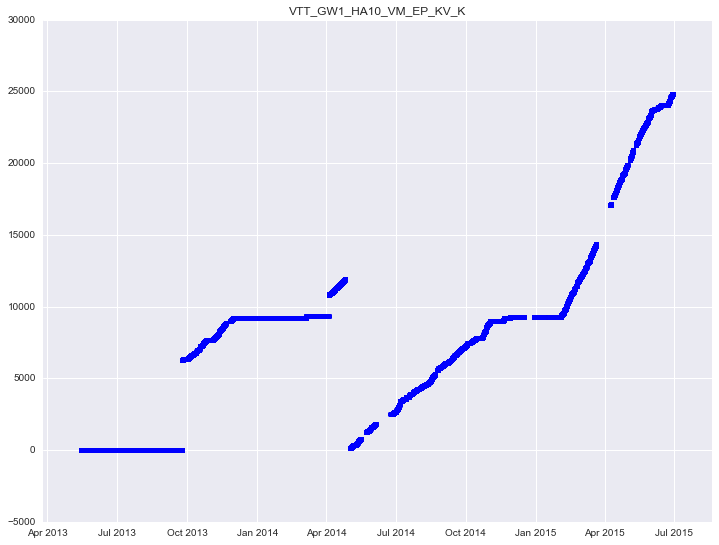

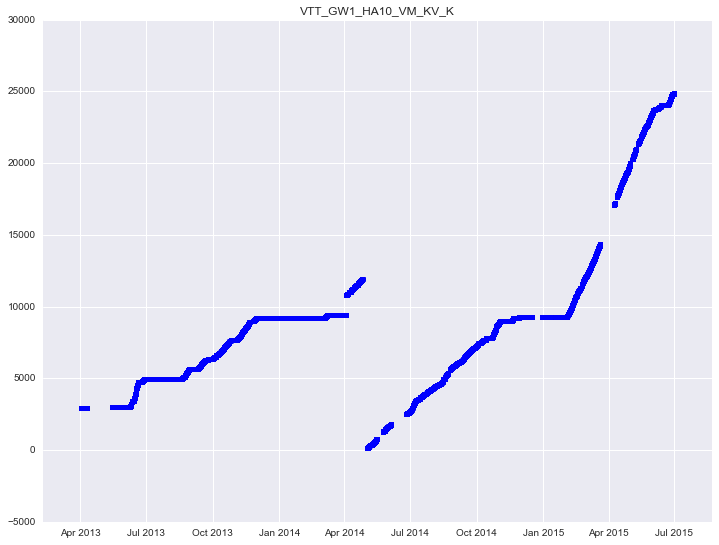

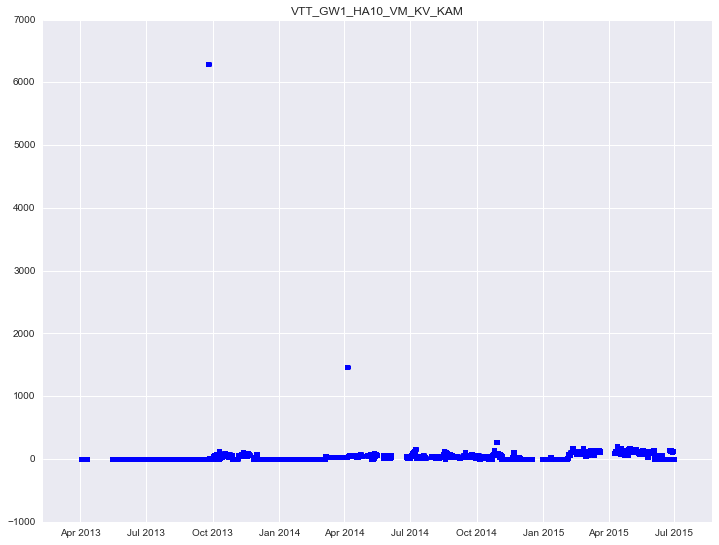

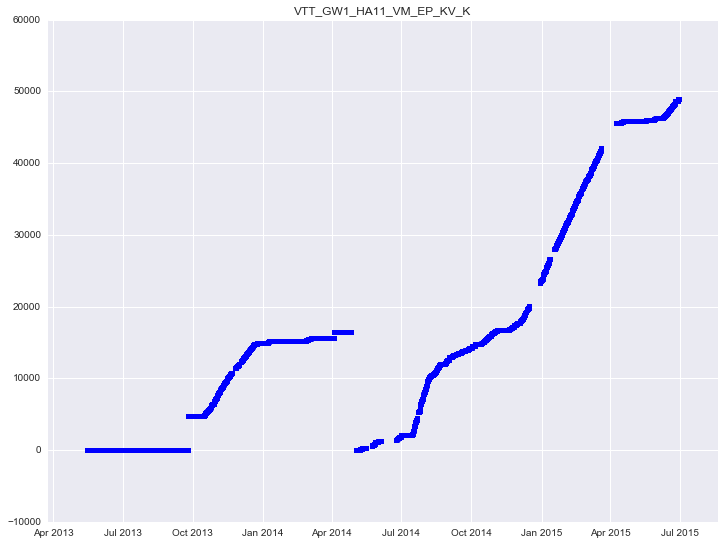

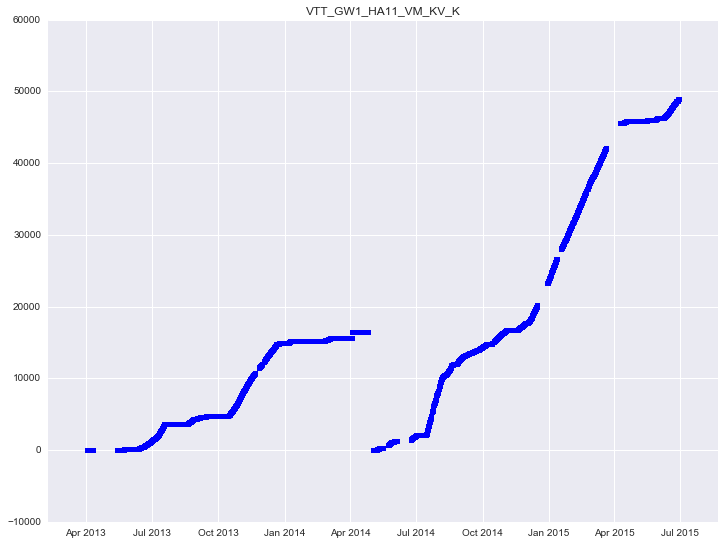

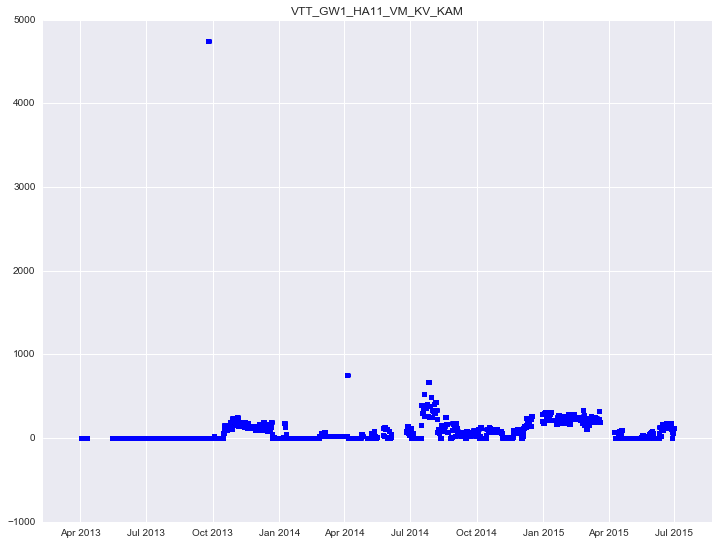

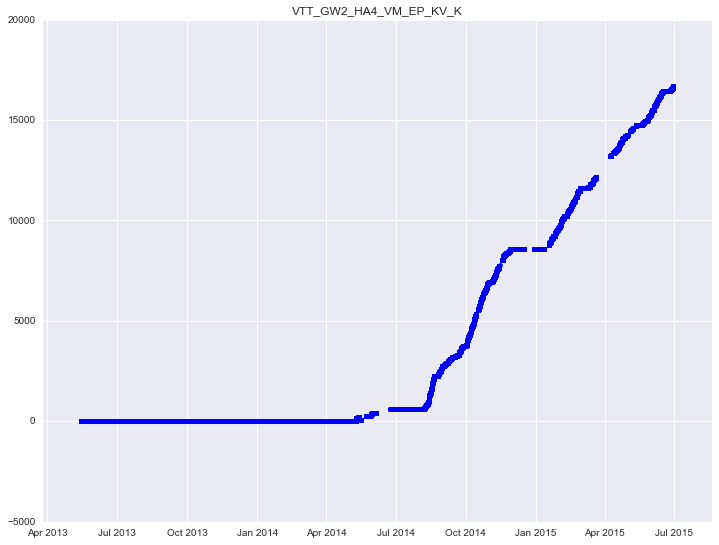

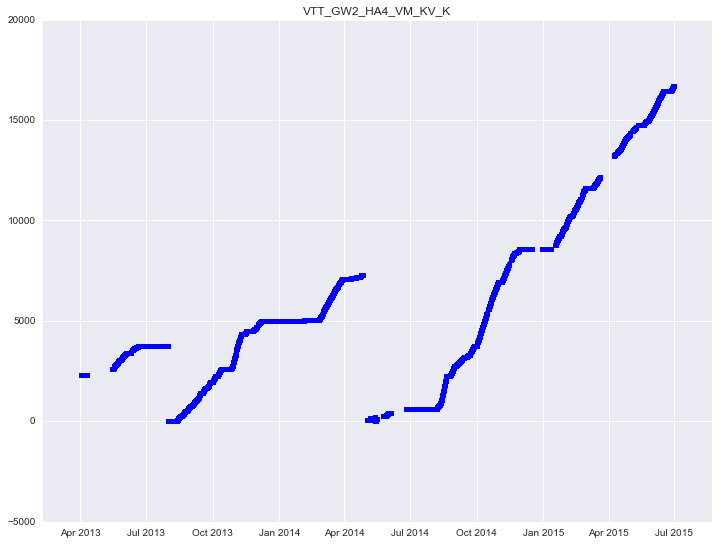

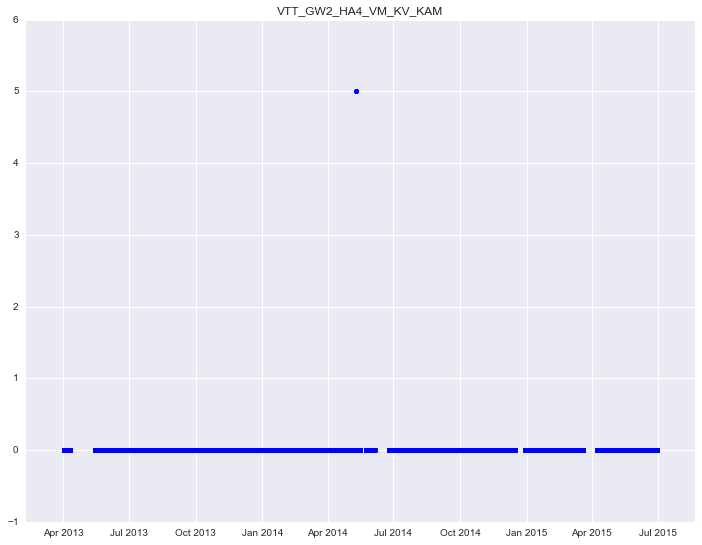

In [4]:
for file in binary_files:
    Graph.Show.raw_data2graph(file)

In [5]:
Graph.Save.raw_data2graph(GlobalParameter.Raw_Data_Repository_Path)

drawing :  VTT_GW1_HA10_VM_EP_KV_K
	run_time: 1.89055991173 sec
drawing :  VTT_GW1_HA10_VM_KV_K
	run_time: 1.97386312485 sec
drawing :  VTT_GW1_HA10_VM_KV_KAM
	run_time: 1.84846305847 sec
drawing :  VTT_GW1_HA11_VM_EP_KV_K
	run_time: 1.50973916054 sec
drawing :  VTT_GW1_HA11_VM_KV_K
	run_time: 1.80690097809 sec
drawing :  VTT_GW1_HA11_VM_KV_KAM
	run_time: 1.60421514511 sec
drawing :  VTT_GW2_HA4_VM_EP_KV_K
	run_time: 1.52049207687 sec
drawing :  VTT_GW2_HA4_VM_KV_K
	run_time: 1.67251086235 sec
drawing :  VTT_GW2_HA4_VM_KV_KAM
	run_time: 1.54749202728 sec


'/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/graph'

---
* file_list 안의 file들을 
    * **Preprocess.data_preprocess(file)**를 통해 preprocess 과정을 거친 뒤, 
    * **FileIO.Save.preprocessed_data2bin_file(preprocessed_data)**를 통해 저장하자
        * 저장 경로는 GlobalParameter.Repository_Path와 GlobalParameter.Preprocessed_Path에 지정된 경로를 따른다 

In [6]:
saved_path_fully_refined, saved_path_skip_interpolation = Preprocess.refining_data()

refining :  VTT_GW1_HA10_VM_EP_KV_K.bin
	with ts_interval 15
	run_time: 6.04105496407 sec
refining :  VTT_GW1_HA10_VM_KV_K.bin
	with ts_interval 15
	run_time: 8.53614211082 sec
refining :  VTT_GW1_HA10_VM_KV_KAM.bin
	with ts_interval 15
	run_time: 8.72555708885 sec
refining :  VTT_GW1_HA11_VM_EP_KV_K.bin
	with ts_interval 15
	run_time: 5.50978183746 sec
refining :  VTT_GW1_HA11_VM_KV_K.bin
	with ts_interval 15
	run_time: 8.31268692017 sec
refining :  VTT_GW1_HA11_VM_KV_KAM.bin
	with ts_interval 15
	run_time: 7.91830921173 sec
refining :  VTT_GW2_HA4_VM_EP_KV_K.bin
	with ts_interval 15
	run_time: 5.37059998512 sec
refining :  VTT_GW2_HA4_VM_KV_K.bin
	with ts_interval 15
	run_time: 8.03925585747 sec
refining :  VTT_GW2_HA4_VM_KV_KAM.bin
	with ts_interval 15
	run_time: 7.84573984146 sec


---
* 저장된 preprocessed_data를 불러오기 위해 지정된 경로를 확인해보자

In [7]:
saved_path_fully_refined, saved_path_skip_interpolation

('/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/15/refined_data_fully_refined',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/15/refined_data_skip_interpolation')

---
* 지정된 경로 preprocessed_file_path에 저장되어있는 data들의 경로를 list로 만들어주자

In [8]:
preprocessed_file_list = FileIO.Load.binary_file_list(saved_path_fully_refined)
preprocessed_file_list

['/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/15/refined_data_fully_refined/VTT_GW1_HA10_VM_EP_KV_K.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/15/refined_data_fully_refined/VTT_GW1_HA10_VM_KV_K.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/15/refined_data_fully_refined/VTT_GW1_HA10_VM_KV_KAM.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/15/refined_data_fully_refined/VTT_GW1_HA11_VM_EP_KV_K.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/15/refined_data_fully_refined/VTT_GW1_HA11_VM_KV_K.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/15/refined_data_fully_refined/VTT_GW1_HA11_VM_KV_KAM.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/15/refined_data_fully_refined/VTT_GW2_HA4_VM_EP_KV_K.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/15/refined_data_fully_refined/VTT_GW2_HA4_VM_KV_K.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/15/refined_data_full

---
* Preprocessing 후, preprocessed_file_list 안의 file들을 data를 graph를 통해 확인해보자 

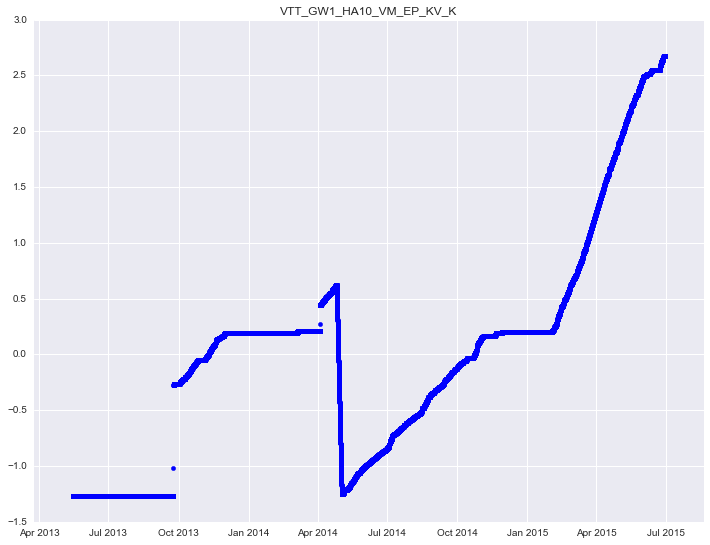

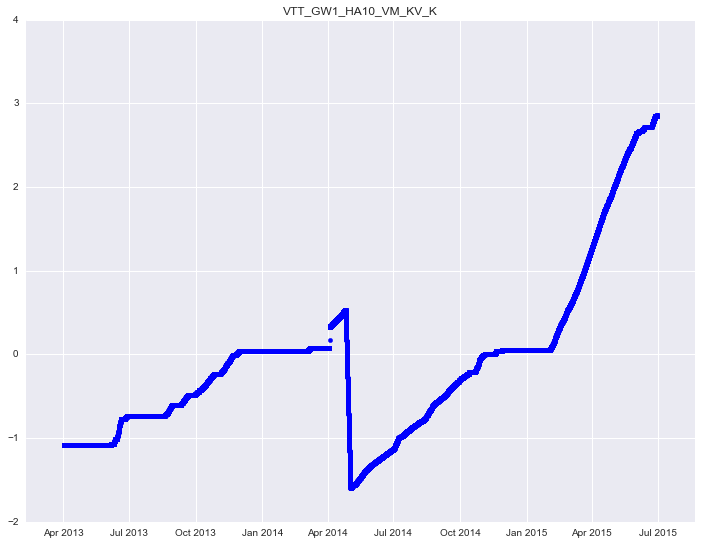

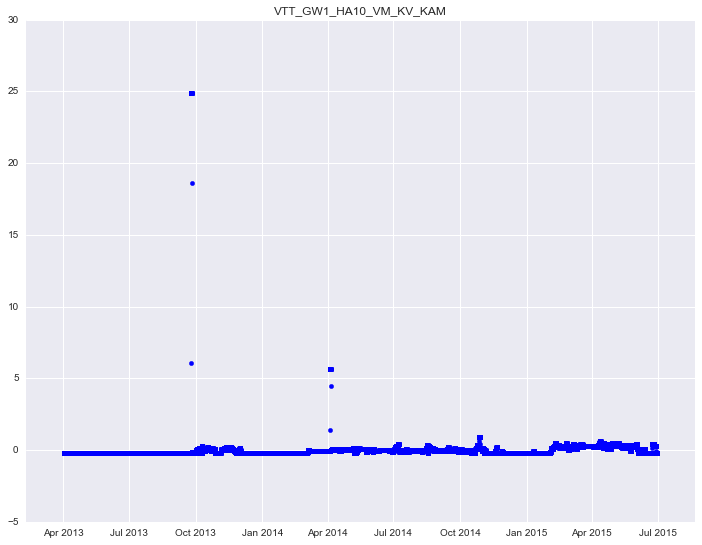

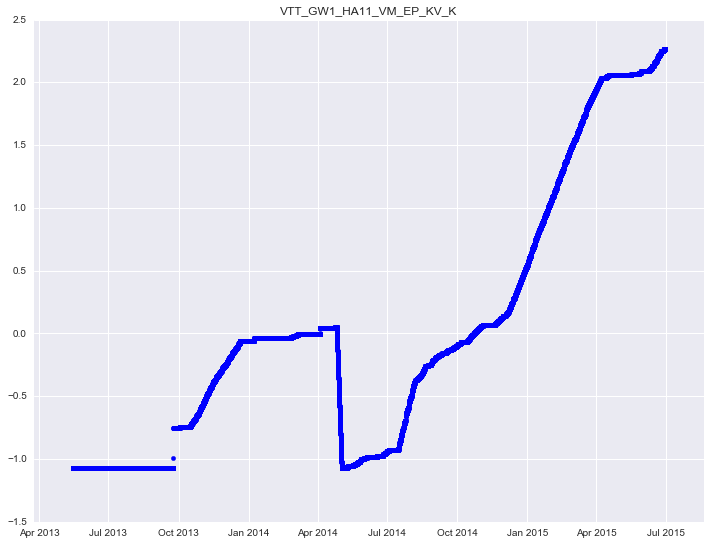

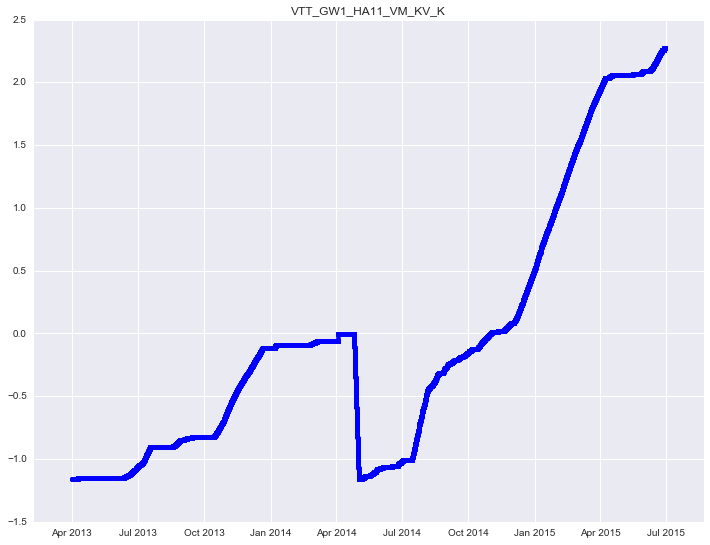

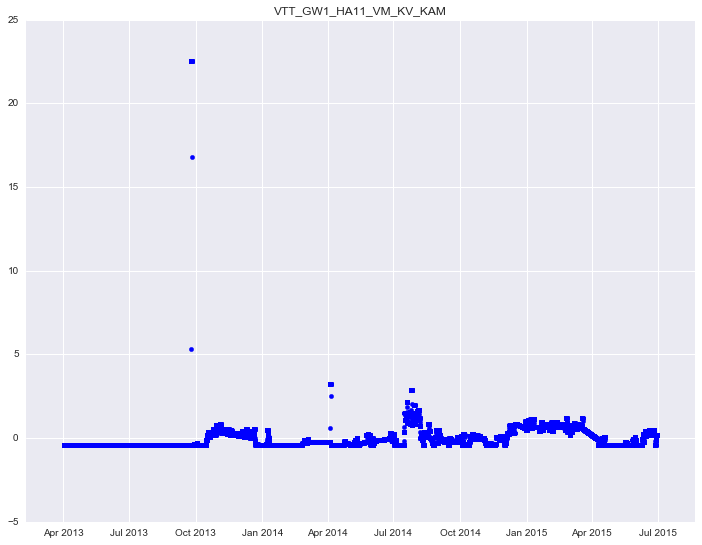

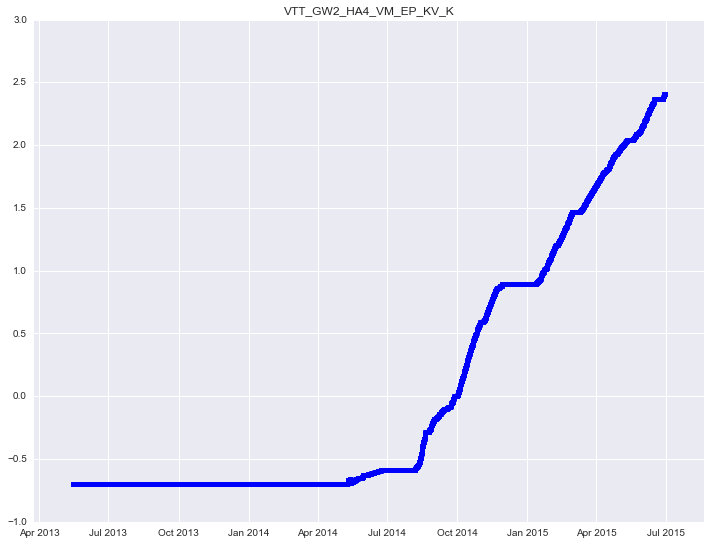

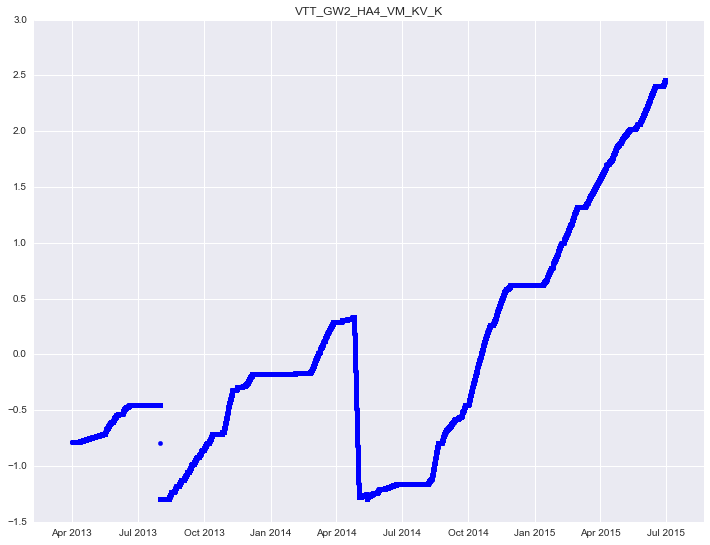

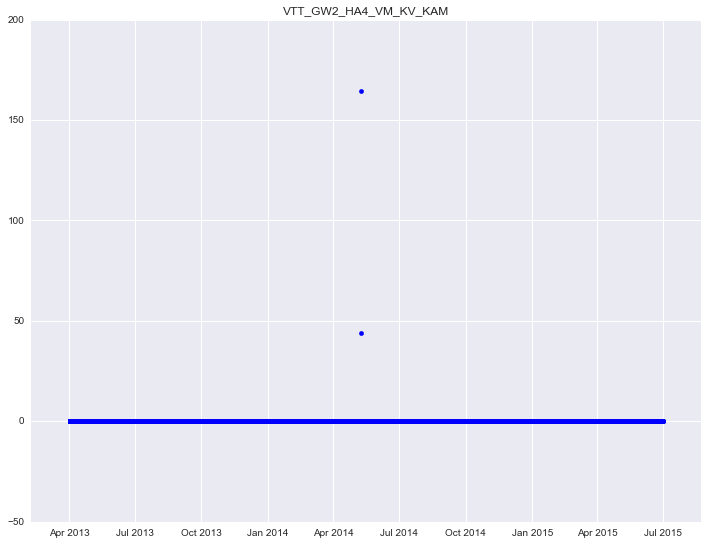

In [9]:
for file in preprocessed_file_list:
    Graph.Show.refined_data2graph(file)

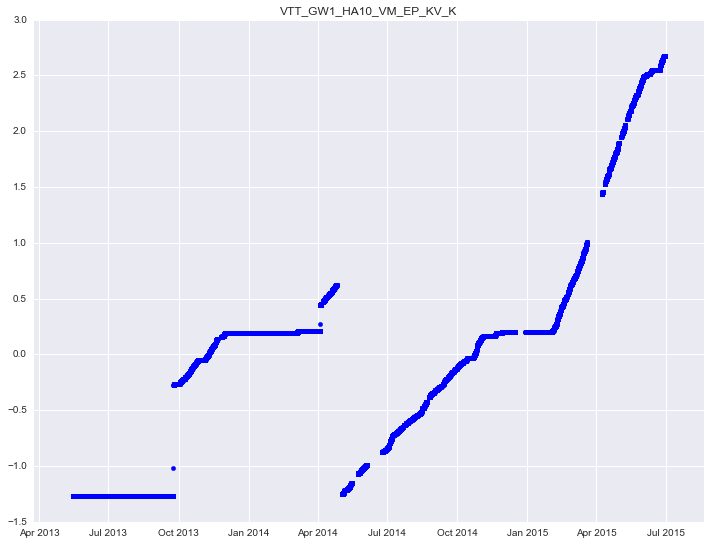

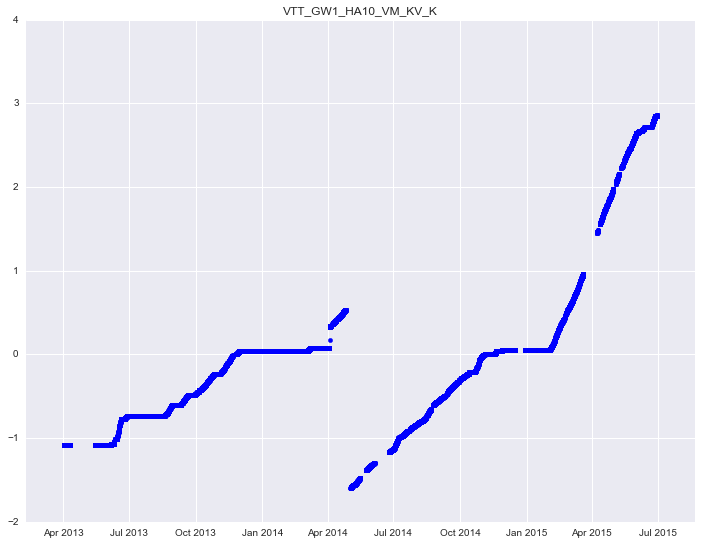

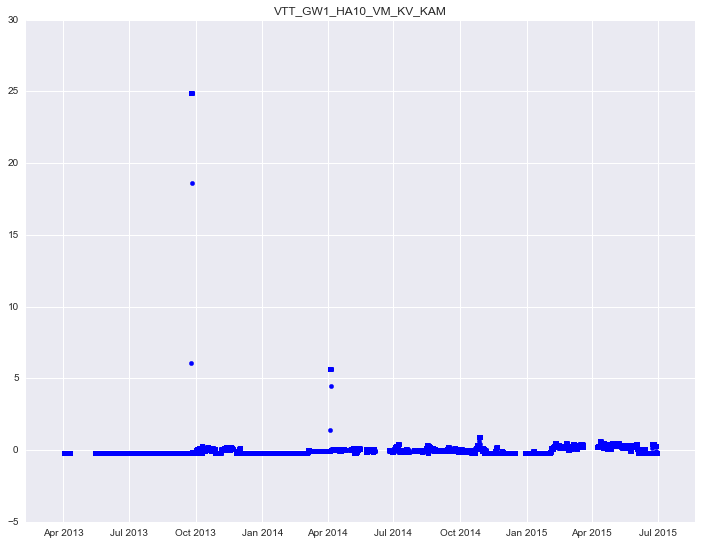

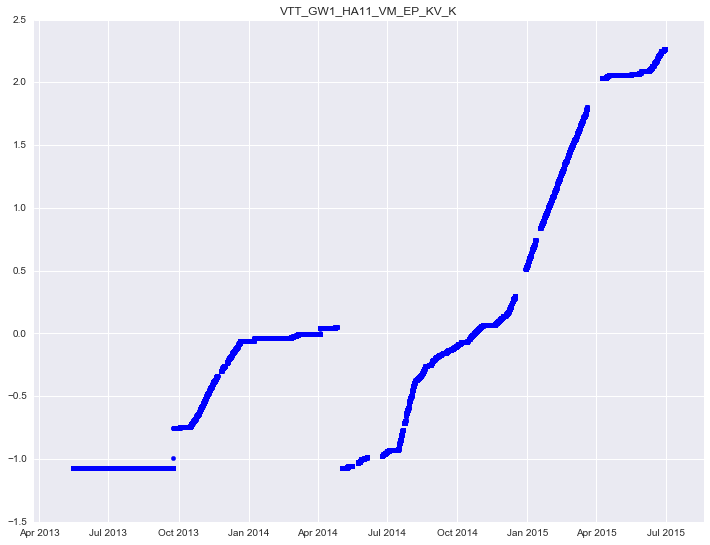

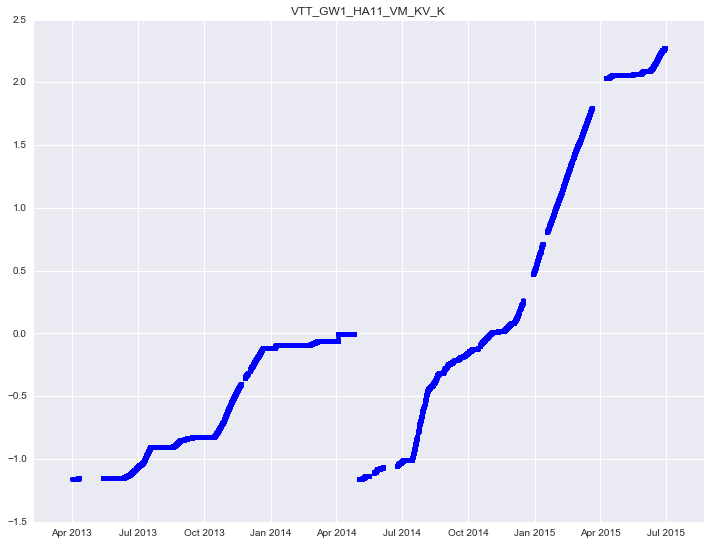

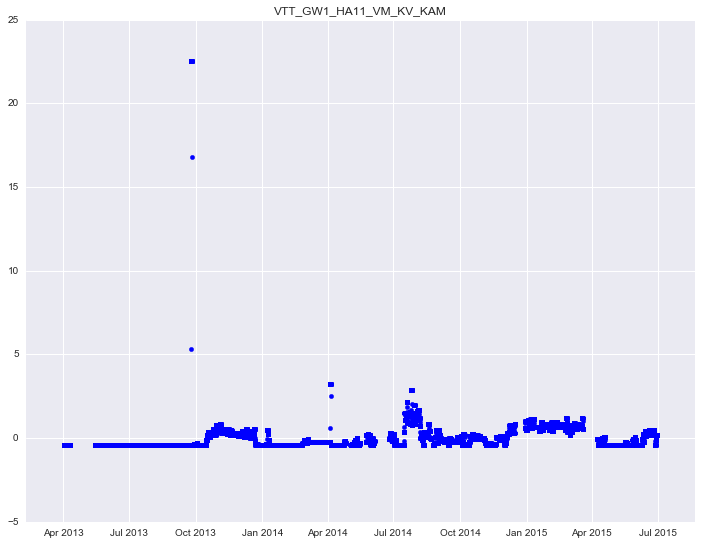

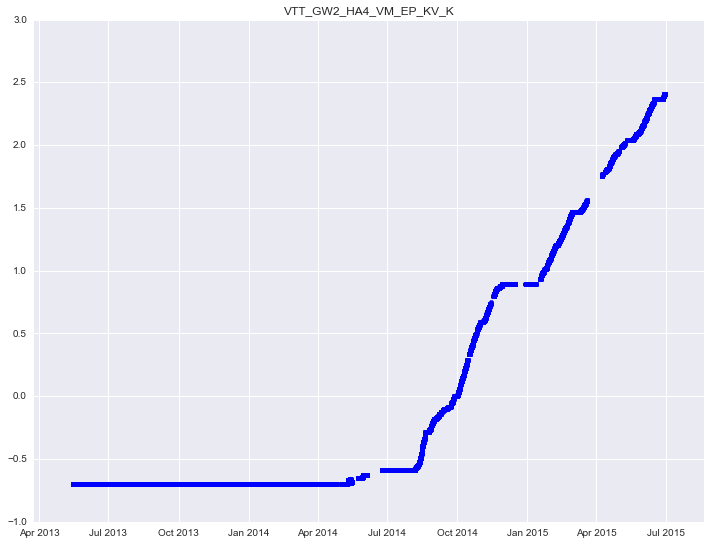

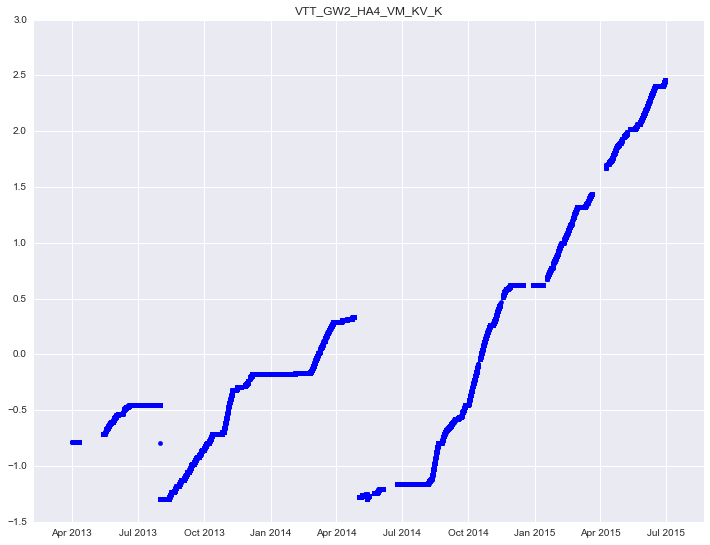

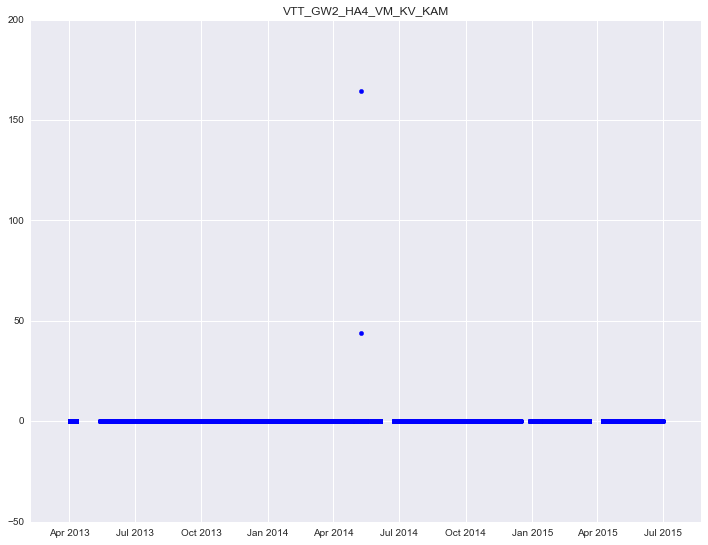

In [10]:
preprocessed_file_list = FileIO.Load.binary_file_list(saved_path_skip_interpolation)

for file in preprocessed_file_list:
    Graph.Show.refined_data2graph(file)

---
##### 위 preprocessing & saving data 과정을 통해 아래와 같은 조건을 만족시켜 data를 분석하기 위한 준비과정을 완료하였음
* preprocessed data
* preprocessed data 를 저장하여, 분석 시 매번 preprocessing을 해야하는 문제 해결

In [11]:
Preprocess.refining_data(time_interval=30)

refining :  VTT_GW1_HA10_VM_EP_KV_K.bin
	with ts_interval 30
	run_time: 3.47869205475 sec
refining :  VTT_GW1_HA10_VM_KV_K.bin
	with ts_interval 30
	run_time: 4.6601099968 sec
refining :  VTT_GW1_HA10_VM_KV_KAM.bin
	with ts_interval 30
	run_time: 3.70639395714 sec
refining :  VTT_GW1_HA11_VM_EP_KV_K.bin
	with ts_interval 30
	run_time: 3.0126478672 sec
refining :  VTT_GW1_HA11_VM_KV_K.bin
	with ts_interval 30
	run_time: 4.02261400223 sec
refining :  VTT_GW1_HA11_VM_KV_KAM.bin
	with ts_interval 30
	run_time: 3.87364888191 sec
refining :  VTT_GW2_HA4_VM_EP_KV_K.bin
	with ts_interval 30
	run_time: 3.19033813477 sec
refining :  VTT_GW2_HA4_VM_KV_K.bin
	with ts_interval 30
	run_time: 4.80129098892 sec
refining :  VTT_GW2_HA4_VM_KV_KAM.bin
	with ts_interval 30
	run_time: 3.8738360405 sec


('/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/30/refined_data_fully_refined',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/30/refined_data_skip_interpolation')

In [12]:
Preprocess.refining_data(time_interval=60)

refining :  VTT_GW1_HA10_VM_EP_KV_K.bin
	with ts_interval 60
	run_time: 2.51976394653 sec
refining :  VTT_GW1_HA10_VM_KV_K.bin
	with ts_interval 60
	run_time: 2.75033116341 sec
refining :  VTT_GW1_HA10_VM_KV_KAM.bin
	with ts_interval 60
	run_time: 2.63333415985 sec
refining :  VTT_GW1_HA11_VM_EP_KV_K.bin
	with ts_interval 60
	run_time: 2.44214391708 sec
refining :  VTT_GW1_HA11_VM_KV_K.bin
	with ts_interval 60
	run_time: 2.94219112396 sec
refining :  VTT_GW1_HA11_VM_KV_KAM.bin
	with ts_interval 60
	run_time: 2.560090065 sec
refining :  VTT_GW2_HA4_VM_EP_KV_K.bin
	with ts_interval 60
	run_time: 2.3457159996 sec
refining :  VTT_GW2_HA4_VM_KV_K.bin
	with ts_interval 60
	run_time: 2.70789003372 sec
refining :  VTT_GW2_HA4_VM_KV_KAM.bin
	with ts_interval 60
	run_time: 2.5763361454 sec


('/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/60/refined_data_fully_refined',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/60/refined_data_skip_interpolation')